In [1]:
from __future__ import print_function
import os
from time import time
from os import listdir
from os.path import isdir

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
SPINE_COLOR = 'gray'

%matplotlib inline

base_dir = '/home/doaa/Documents/Spring2016_SE_Project/'


/home/doaa/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [124]:
# Constants
NUM_TOPICS = 10
max_df = 0.7
min_df = 0.4
# suffix = str(max_df)+'_'+str(min_df) # for 10
# lang = 'categories_fixed_'
# lang = 'all_'
lang = ''
suffix = lang + str(NUM_TOPICS)+'_'+str(max_df)+'_'+str(min_df)
print(suffix)

categories_fixed_10_0.7_0.3


In [82]:
proj_topic = pd.read_csv(os.path.join(base_dir, 'results/project-topic_'+suffix+'.csv'), index_col=0)
#  normalize values
for i in proj_topic.index:
    proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]] = \
                proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]]\
                    / (proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]].max())
# To date
proj_topic.date = pd.to_datetime(proj_topic.date)
proj_topic.sort_values('date', inplace=True)
print(proj_topic.shape)
proj_topic.head()

(200, 12)


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date
rails-tags_2005-01,0.000010,0.000010,1.000000,0.000010,0.008258,0.013574,0.008417,0.000509,0.000010,0.000010,rails,2005-01-01
cakephp-tags_2005-06,0.000049,0.000049,0.000049,0.019494,1.000000,0.022887,0.023660,0.048483,0.090665,0.110995,cakephp,2005-06-01
rails-tags_2005-06,0.012492,0.000941,1.000000,0.000005,0.002281,0.007655,0.015041,0.001454,0.000005,0.000005,rails,2005-06-01
cakephp-tags_2006-01,0.000025,0.000025,0.002352,0.000025,1.000000,0.000025,0.022946,0.000025,0.010194,0.055054,cakephp,2006-01-01
rails-tags_2006-01,0.009167,0.000004,1.000000,0.000004,0.003605,0.014776,0.011783,0.005005,0.000004,0.000004,rails,2006-01-01


In [83]:
topics = pd.read_csv(os.path.join(base_dir, 'results/topic_word_'+suffix+'.csv'), index_col=0)
topics_freq = pd.read_csv(os.path.join(base_dir, 'results/topic_word_freq_'+suffix+'.csv'), index_col=0)

topics.head(10)

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22,word23,word24,word25,word26,word27,word28,word29,word30,word31,word32,word33,word34,word35,word36,word37,word38,word39,word40,word41,word42,word43,word44,word45,word46,word47,word48,word49
topic#0,factori,transact,mock,annot,apach,web,servic,listen,impli,basi,unless,warranti,2002,persist,synchron,invoc,xml,holder,editor,illeg,abstract,task,writer,processor,descriptor,schedul,thread,singleton,aspect,ha,awar,adapt,deleg,metadata,destin,new,matcher,row,uri,rollback,empti,reflect,socket,accessor,export,concurr,callabl,thrown,refresh,dispatch
topic#1,admin,articl,book,middlewar,widget,backend,person,func,foreign,column,migrat,decim,opt,tupl,serial,signal,2006,transact,lazi,aggreg,fixtur,citi,feed,regress,slug,timezon,thread,conf,modul,doe,csrf,keyword,dictionari,recent,transform,digit,distanc,annot,layer,factori,sequenc,boolean,oracl,publish,pagin,empti,defer,perm,constraint,editor
topic#2,column,topic,person,fixtur,reflect,2005,transact,peopl,compani,servic,observ,rubi,klass,zone,proc,accessor,adapt,repli,destroy,mailer,belong,flash,timezon,migrat,recipi,mock,reduc,2004,dispatch,2003,plural,sanit,singular,2006,minut,foreign,mixin,admin,spec,street,children,selector,stylesheet,approv,thread,chain,opt,modul,finder,autoload
topic#3,column,topic,person,migrat,zone,klass,fixtur,reflect,destroy,dispatch,rubi,adapt,2005,autoload,compani,peopl,asset,belong,mailer,admin,task,transact,i18n,proc,ship,draw,foreign,human,repli,precis,accessor,subscrib,stub,thread,middlewar,2006,book,sanit,blog,minut,concat,plural,2000,serial,owner,flash,stylesheet,singular,deleg,approv
topic#4,suit,column,foundat,lib,dispatch,revis,assoc,func,wiki,row,singular,plural,ha,2006,2005,admin,long,sprintf,ajax,flash,short,ident,belong,new,stdout,explod,db,camel,div,foreign,theme,trim,persist,transact,i18n,driver,2008,children,human,col,disconnect,dir,endpoint,observ,greedi,network,vendor,formatt,abort,empti
topic#5,conn,fieldnam,tab,warranti,technolog,person,shall,role,column,2014,publish,modul,damag,merchant,fit,conf,contract,liabil,grant,aris,impli,liabl,tort,claim,holder,permit,british,websit,contributor,backup,whitelist,fname,export,owner,2012,sync,setter,recipi,perm,schedul,administr,blog,2013,renam,prop,home,children,currenc,transact,america
topic#6,driver,row,column,team,guid,conn,cell,newlin,temp,platform,tablenam,adapt,alter,wide,tran,retval,migrat,2008,newer,transact,flash,pack,encrypt,modul,thread,sess,trim,ticket,socket,servic,nbsp,disk,func,smtp,marker,mysql,mock,sqlite,plural,endpoint,mobil,meth,filepath,suppli,menu,rollback,ctype,memcach,explod,bundl
topic#7,bundl,constraint,street,servic,transform,factori,listen,mock,metadata,formatt,sprintf,fixtur,dispatch,ident,ha,children,violat,foundat,role,dir,gmail,finder,matcher,tran,xml,strategi,boolean,serial,empti,widget,foo,csrf,selector,reflect,foobar,question,mask,abstract,scalar,timezon,round,annot,adapt,prop,bar,stub,sibl,max,collector,column
topic#8,articl,mock,foundat,shell,column,driver,network,pagin,fixtur,task,book,dispatch,socket,ha,listen,empti,belong,foreign,exp,memcach,new,reg,widget,checkbox,assoc,startup,transport,timezon,constraint,middlewar,contact,asset,tear,theme,publish,serial,unlock,xml,sprintf,plural,radio,prop,marshal,i18n,bootstrap,formatt,2012,admin,singular,strategi
topic#9,articl,2007,plural,fixtur,appl,task,upper,publish,foundat,2006,2005,capit,ha,shell,dispatch,book,socket,contact,db,column,suit,pagin,belong,lib,foreign,admin,assoc,latin,singular,mock,short,2008,ident,js,theme,reg,sampl,green,children,exp,2012,2011,startup,blue,thread,ajax,empti,interact,2010,person


In [84]:
topics_freq.head(10)

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22,word23,word24,word25,word26,word27,word28,word29,word30,word31,word32,word33,word34,word35,word36,word37,word38,word39,word40,word41,word42,word43,word44,word45,word46,word47,word48,word49
topic#0,327714.053376,209250.624453,152438.050221,138950.210717,120531.118154,71414.315406,56612.736474,55672.237690,53775.719744,53649.282978,53454.132716,53436.328112,52633.853495,45655.541158,42742.859827,41781.763198,39449.818382,38275.068163,38000.341178,37948.109736,35369.227337,34683.795194,32272.511982,32266.940186,31743.835623,30590.302613,30295.282139,30125.107185,30010.849212,29866.971873,27289.911787,26492.129146,25453.255966,25220.256580,24965.753640,24904.885959,23785.812658,20777.262528,20141.267204,20048.065767,19516.929967,19358.961360,19306.064839,19277.285454,18744.571226,18559.959161,18250.841454,18116.872699,18099.423303,17932.567148
topic#1,51394.577848,30051.126508,19842.062145,19126.504567,15274.429770,14251.289442,13991.719148,13942.573450,12891.066180,12103.299770,11433.166508,11351.130526,10772.345874,9593.123679,8888.824237,7914.672363,6814.379165,6673.841005,6577.900948,6370.284875,5995.771640,5763.653254,5627.577772,5614.569062,5293.403384,5084.850821,5015.025318,4852.358676,4832.134418,4759.579976,4740.744216,4682.799744,4607.721093,4582.392832,4546.903787,4452.848927,4368.425050,4131.030024,4114.780440,4003.484734,3948.977505,3660.143339,3643.015423,3616.836797,3595.050191,3577.076436,3554.147254,3538.193934,3524.213550,3417.918208
topic#2,25476.047308,21107.979095,17035.428914,14647.867092,11252.018794,9244.486327,7825.166519,7787.381220,7584.890080,7108.739577,7081.230625,6888.274414,6830.141684,6627.881480,6583.108174,5611.463970,5578.849645,5232.528516,5168.886930,5047.118011,4699.362811,4668.180656,4248.105441,4110.668031,4097.947879,3830.639088,3703.146907,3647.949173,3437.965854,3409.044736,3343.595008,3276.113213,3212.116987,3048.589045,2955.750487,2934.599560,2924.743133,2881.579086,2853.249935,2813.408155,2805.526392,2793.098607,2765.487215,2595.374534,2588.255980,2543.364614,2534.536039,2470.459194,2381.592698,2331.043352
topic#3,48452.926612,46345.354874,37264.832618,25575.454476,25289.982729,15734.630998,15679.623748,15468.694280,15450.040869,15164.725936,14762.744218,14532.974348,14000.336591,13657.380469,13592.546438,13014.205558,12922.335430,11781.526309,11246.790537,10504.554844,10065.299264,9320.851759,8975.913781,8879.679718,8591.456523,7970.093152,7934.912848,7882.921524,7720.541541,7557.078445,7030.878929,6992.641972,6977.350862,6915.922674,6512.369257,6451.209131,6387.029998,6253.566855,6142.371305,5984.295959,5882.362190,5690.412508,5665.223131,5628.733770,5446.050363,5316.330899,5244.485341,5108.725567,5076.339884,5022.419598
topic#4,4905.938323,2841.109313,2227.789610,2227.276544,1869.374849,1653.416098,1639.622995,1627.703581,1475.885050,1349.847054,1344.599713,1309.490775,1261.007453,1219.642480,1186.477976,1173.854616,1166.402541,1162.765864,1104.106312,996.600693,984.793254,949.306874,818.701984,667.391318,649.898930,643.426762,625.743814,624.543309,620.357489,587.869833,565.492741,561.583121,553.312478,531.192937,528.063159,498.452298,493.313515,491.754072,434.422352,420.735685,389.473773,387.651050,369.223194,366.443335,365.339645,338.507181,329.526873,319.261827,309.509400,297.150523
topic#5,7365.289112,5086.487480,4458.520877,3564.995967,3539.739763,3523.943234,3460.031540,3234.473734,3175.616852,2454.479532,2034.228475,2024.239312,1910.232620,1909.959730,1905.999862,1902.765665,1863.135689,1854.258729,1836.531423,1826.069878,1821.861535,1792.897380,1761.091139,1717.127745,1717.072351,1712.366810,1674.024963,1599.321148,1553.997925,1466.600911,1341.814384,1229.506226,1219.727240,1170.393842,1166.210487,969.431478,940.384115,937.893642,936.850427,921.795652,903.429520,888.801345,818.629443,813.510008,799.280653,760.111856,754.679

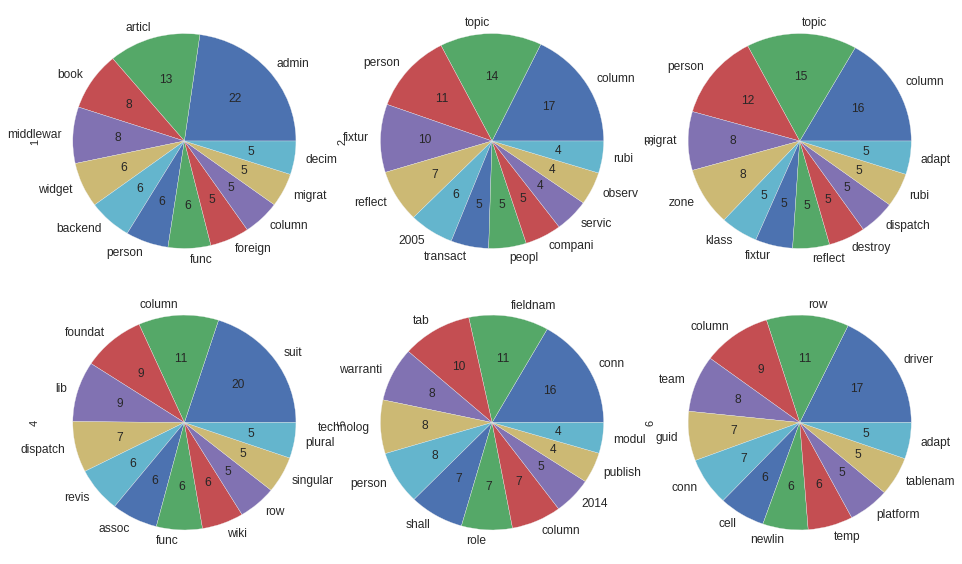

In [110]:
fig = plt.figure(1, figsize=(13,8))

df = topics_freq.reset_index(level=0)
df = df.drop('index', axis=1).T[0:12]
df
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    df[i].astype(float).plot.pie(ax=ax, label=None, fontsize=12,
                    labels=topics.T.ix[0:12, i], autopct='%.d')
plt.tight_layout()
fig.savefig('topic-word'+suffix+'.png', bbox_inches='tight', dpi=350)

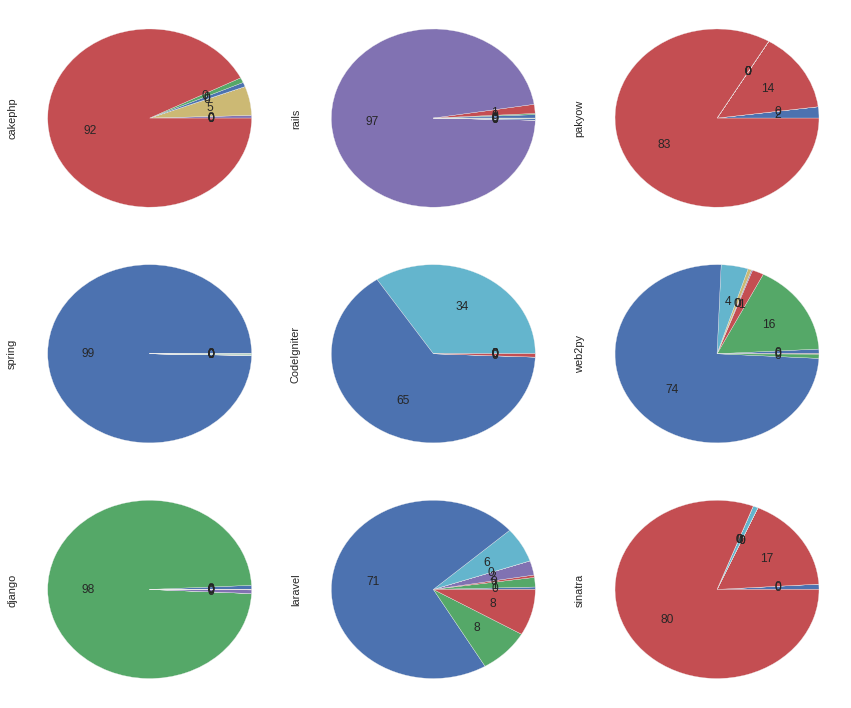

In [86]:
latests_projects = proj_topic[proj_topic.date == "2016-01-01"].copy()
to_remove = ['express', 'derby', 'flask', 'symfony']
latests_projects = latests_projects[~latests_projects.project.isin(to_remove)]

# latests_projects[latests_projects.columns[0:NUM_TOPICS]] = latests_projects[latests_projects.columns[0:NUM_TOPICS]].applymap(lambda x: 0 if x>0.99 else x*100)
# latests_projects

fig = plt.figure(1, figsize=(12,10))

df = latests_projects.reset_index(level=0)
df.set_index('project', inplace=True)
df = df.drop('index', axis=1).T[0:NUM_TOPICS-1]
df
for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    df.ix[:, i-1].astype(float).plot.pie(ax=ax, autopct='%.d',
                    labels=None#df.index.values
                                )

# h, l = ax.get_legend_handles_labels()
# plt.figlegend(h, df.index.values, loc='lower center',  ncol=5, bbox_to_anchor=(0.4, 0.02))
    
plt.tight_layout()
plt.savefig('project-topic'+suffix+'.png', dpi=400)


# 1- Each project evolution over time

9
Rows:  3
cakephp (22, 12)
django (21, 12)
frappe (9, 12)
pakyow (9, 12)
rails (23, 12)
sinatra (17, 12)
spring (15, 12)
symfony (12, 12)
web2py (9, 12)
project_time10_0.7_0.4.png


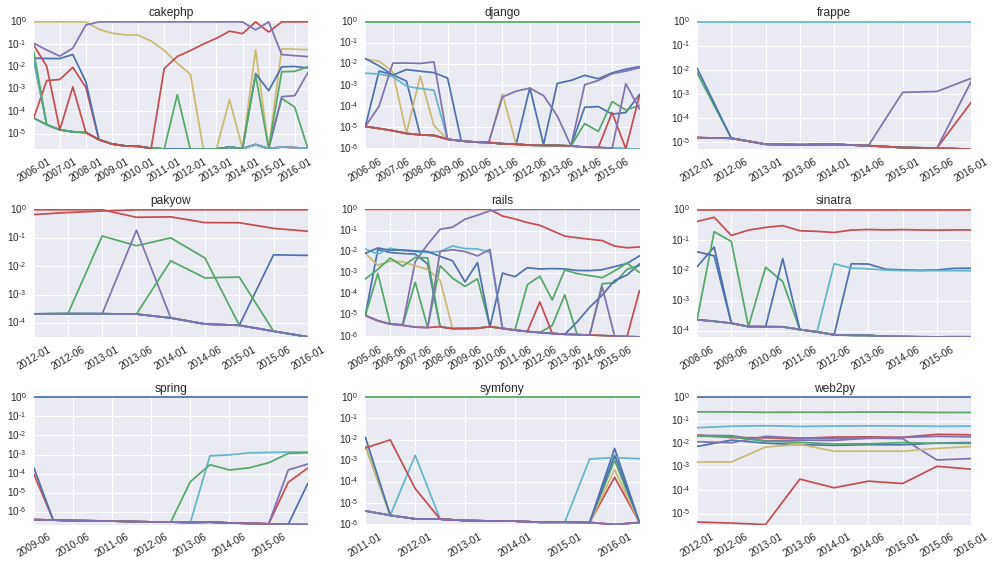

In [94]:
#Remove projects with unsuffient data
fig = plt.figure(3, figsize=(14,8))
to_remove = ['express', 'derby', 'flask', 'CodeIgniter', 'laravel']
temp = proj_topic[~proj_topic.project.isin(to_remove)]
proj_topic.shape

groups = temp.groupby('project')

i=1
print(groups.ngroups)
rows = int(groups.ngroups/3)
print('Rows: ', rows)
for name, p in groups:    
    ax = fig.add_subplot(rows,3,i)
    i+=1
    ax = p[proj_topic.columns[0:NUM_TOPICS]].plot(logy=True, ax=ax)
    ax.set_xticklabels(p['date'].dt.strftime( "%Y-%m"))
    if p.shape[0] >10:
        ax.set_xticklabels([c for o,c in enumerate(p['date'].dt.strftime( "%Y-%m")) if o%2!=0])
        ax.set_xticks(np.arange(0, p.shape[0], 2))
    else:
        ax.set_xticklabels(p['date'].dt.strftime( "%Y-%m"))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30)
    ax.set_title(name)
    ax.legend([])
    ax.set_ylim([-0.1, 1.1])
    print(name, p.shape)
#     if i==13:
#         break

plt.tight_layout()
fig.savefig('project_time'+suffix+'.png', dpi=350)
print('project_time'+suffix+'.png')

In [73]:
# proj_topic[proj_topic['project']=='django']


In [74]:
# proj_topic

In [75]:
# groups = proj_topic.groupby('date')#.sum()

# for i, g in groups:
#     print(i, g.sum())
# ax = groups.plot()
# ax.legend(bbox_to_anchor=(1.3, 1))
# ax.set_yticklabels([])
# ax.set_ylabel('density')

(23, 10)


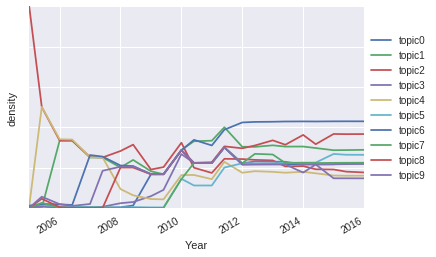

In [103]:
fig = plt.figure(5, figsize=(7,4))
groups = proj_topic.groupby('date').mean()
print(groups.shape)

ax = groups.plot(figsize=(6,4))
ax.legend(bbox_to_anchor=(1.21,.9))
# ax.legend([])
ax.set_yticklabels([])
ax.set_ylabel('density')
ax.set_xlabel('Year')

# plt.tight_layout()
plt.savefig('topic_time'+suffix+'.png', bbox_inches='tight', dpi=350)

In [12]:

# proj_topic[proj_topic.date=='2016-01-01']

In [13]:
# f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
# for i, k in enumerate([0, 5, 9, 14, 19]):
#     ax[i].stem(topics.ix[k,:], linefmt='b-',
#                markerfmt='bo', basefmt='w-')
#     ax[i].set_xlim(-50,4350)
#     ax[i].set_ylim(0, 0.08)
#     ax[i].set_ylabel("Prob")
#     ax[i].set_title("topic {}".format(k))

# ax[4].set_xlabel("word")

# plt.tight_layout()


In [14]:
# df = proj_topic[proj_topic.date=='2016-01-01']


# f, ax= plt.subplots(7, 1, figsize=(8, 12), sharex=True)
# for i in range(7):
#     ax[i].stem(df.ix[i,0:10], linefmt='r-',
#                markerfmt='ro', basefmt='w-')
#     ax[i].set_xlim(-1, 21)
#     ax[i].set_ylim(0, 1)
#     ax[i].set_ylabel("Prob")
#     ax[i].set_title("{}".format(df.ix[i,10]))

# ax[6].set_xlabel("Topic")

# plt.tight_layout()
# plt.show()
# plt.savefig('project_topc'+suffix+'.png', bbox_inches='tight', dpi=350)

In [15]:
proj_topic.head()
# df = proj_topic[proj_topic.date=='2016-01-01']

# a = {}
# for i in range(NUM_TOPICS):
#     a[i] = df[df.ix[:,i]>0.8].project#.ix[:, 10:12]
#     print(len(a[i]))
#     a[i] = np.unique(a[i])
# a


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date
index,,,,,,,,,,,,
0hh1,0.000040,1.000000,0.036886,0.168486,2.833255e-02,4.023518e-05,0.397630,0.000040,0.000040,0.000040,0hh1,2016-01-01
oryx,0.000005,0.000005,0.000005,1.000000,1.796732e-02,6.145838e-01,0.000005,0.000005,0.000005,0.010188,oryx,2016-01-01
openage,0.000016,0.047340,0.075629,0.143267,1.804724e-01,1.639160e-05,1.000000,0.000016,0.320174,0.001464,openage,2016-01-01
nupic,0.000243,0.018537,0.274313,1.000000,9.312631e-07,9.312607e-07,0.105727,0.000527,0.005452,0.160423,nupic,2016-01-01
neovim,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,neovim,2016-01-01


# Clustering Analysis

In [71]:
# Constants
NUM_TOPICS = 10
max_df = 0.7
min_df = 0.3
lang = 'categories_fixed_'
suffix = lang + str(NUM_TOPICS)+'_'+str(max_df)+'_'+str(min_df)
print(suffix)


projects_details = pd.read_csv(os.path.join(base_dir, 'results/projects_details.csv'), index_col=0)
# projects_details.rename(columns={'index': 'project'}, inplace=True)
                               

categories_fixed_10_0.7_0.3


In [2]:
# df = proj_topic[proj_topic.date=='2016-01-01']


# f, ax= plt.subplots(2, 5, figsize=(14, 4), sharex=True)
# for i in range(NUM_TOPICS):
#     x = i%2
#     y = int(i/2)
#     ax[x][y].stem(df.ix[:,i], linefmt='r-',
#                markerfmt='ro', basefmt='w-')
# #     ax[x][y].set_xlim(-1, 21)
#     ax[x][y].set_ylim(0, 1)
#     ax[x][y].set_ylabel("Prob")
#     ax[x][y].set_title("{}".format(df.columns[i]))

# ax[x][y/2].set_xlabel("Projects")

# plt.tight_layout()

# plt.savefig('topic_projects'+suffix+'.png', bbox_inches='tight', dpi=350)

In [73]:
topic_word_raw = pd.read_csv(os.path.join(base_dir, 'results/topic_word_raw_'+suffix+'.csv'), index_col=0)
topic_word_raw.shape

(10, 2079)

Data Visulization
Games Engines
Machine Learning
Text Editor
Web Framework
Web Games


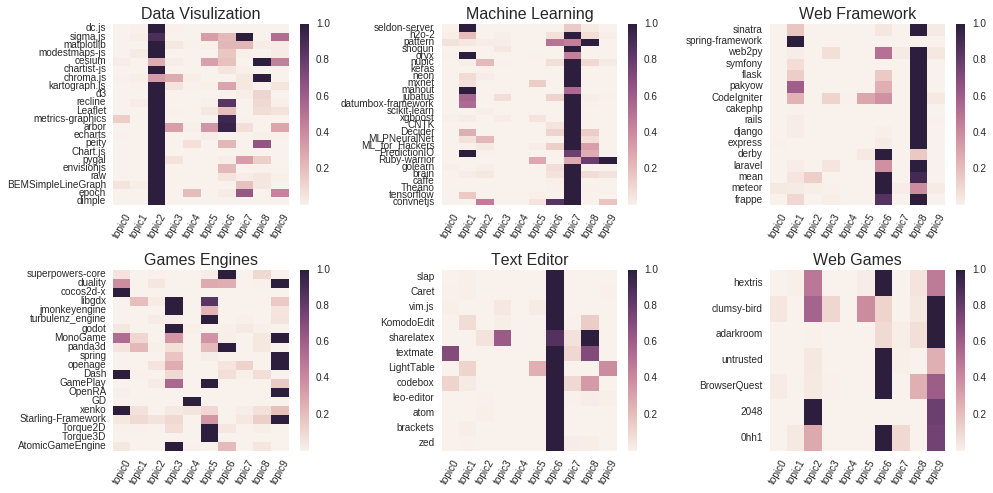

In [85]:
import seaborn as sns
from scipy.spatial.distance import cosine

proj_topic = pd.read_csv(os.path.join(base_dir, 'results/project-topic_'+suffix+'.csv'), index_col=0)

#  normalize values
for i in proj_topic.index:
    proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]] = \
                proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]]\
                    / (proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]].max())


clusters = pd.merge(projects_details, proj_topic, right_index=True, left_index=True)
clusters.reset_index(inplace=True)
clusters.sort_values('group', inplace=True)
df = clusters#[~projects['index'].isin(to_remove)]
df.set_index('index', inplace=True)
categories = df.groupby('group')
categories.ngroups

f, ax= plt.subplots(2, 3, figsize=(14, 7))#, sharex=True)
   
for i, (name, g) in enumerate(categories):
    x = i%2
    y = int(i/2) 
    print(name)
    sns.heatmap(g.ix[:,2:NUM_TOPICS+2], ax=ax[x][y])#, cmap="RdBu_r", cbar=False)
    ax[x][y].set_title(name, fontsize=16)
    ax[x][y].set_ylabel('')
    labels = ax[x][y].get_xticklabels()
    plt.setp(labels, rotation=60)
    
plt.tight_layout()

plt.savefig('topic_projects_heatmap'+suffix+'.png', bbox_inches='tight', dpi=350)

In [75]:
projects['sum'] = projects.ix[:,2:2+NUM_TOPICS].sum(axis=1)
projects['type'].unique()

NameError: name 'projects' is not defined

## Test 1: Finding similar topics By joining topics based on projects


In [76]:

# mat = clusters[clusters.columns[2:NUM_TOPICS+2]]

# n = mat.shape[1]
# sim = []
# for i in range(n):
#     for j in range(i+1,n):
#         s = 1- cosine(mat[mat.columns[i]], mat[mat.columns[j]])
#         if s > 0.3:
#             sim.append([mat.columns[i], mat.columns[j]])

# print(sim)
# # merge similar columns (topics)
# for row in sim:
#     mat.loc[:, row[0]] = mat[row[0]] + mat[row[1]]

# # drop columns after adding similarities (don't merge with above, can be recursive)
# for row in sim:
#     mat.loc[: ,row[1]] = 0 # empty topic


## Test2: Finding similar topics by joining topics based on their words  ---> better than test 1

In [78]:
threshold = 0.6


mat = topic_word_raw.T

n = mat.shape[1]
sim = []
for i in range(n):
    for j in range(i+1,n):
        s = 1- cosine(mat.ix[:, i], mat.ix[:, j])
        if s > threshold:
            print('topic{}-topic{}: {}'.format(i,j,s))
            sim.append([mat.columns[i], mat.columns[j]])

print(sim)
mat = clusters[clusters.columns[2:NUM_TOPICS+2]]
# merge similar columns (topics)
for row in sim:
    mat.ix[:, row[0]] = mat.ix[:,row[0]] + mat.ix[:,row[1]]
    # drop columns after adding similarities (don't merge with above, can be recursive)
    mat.ix[: ,row[1]] = 0 # empty topic
    mat.replace(row[1], row[0])


topic1-topic8: 0.6129212066098929
[[1, 8]]


/home/doaa/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:545: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


## Test 3: # Finding CATEGORIES: joining topics based on their words  ---> topic can belong to many categories


In [164]:
threshold = 0.5

def get_cluster_matrix(mat, sim):
    categ = pd.DataFrame()
    # merge similar columns (topics)
    for row in sim:
        cat_name = str(row[0]) + '_' + str(row[1])
        categ[cat_name] = mat.ix[:,row[0]] + mat.ix[:,row[1]]

    # for unique topics copy as separete category
    for i in range(NUM_TOPICS):
        if unique[i] == 1:
            categ[i] = mat.ix[:, i]
    return categ


mat = topic_word_raw.T
n = mat.shape[1]
sim = []
unique = [1] * NUM_TOPICS
for i in range(n):
    for j in range(i+1,n):
        s = 1 - cosine(mat.ix[:, i], mat.ix[:, j])
        if s > threshold:
            print('topic{}-topic{}: {}'.format(i,j,s))
            sim.append([mat.columns[i], mat.columns[j]])
            # mark topic i and topic j as non unique categories
            unique[i], unique[j] = 0, 0
            

print(sim)
mat = clusters[clusters.columns[2:NUM_TOPICS+2]]
categ = get_cluster_matrix(mat, sim)
    
mat = categ
print(mat.shape)
# mat

topic1-topic8: 0.6129212066098929
topic3-topic5: 0.5613304091194783
topic5-topic9: 0.527327237683313
[[1, 8], [3, 5], [5, 9]]
(103, 8)


# Test 4: Find recirsive categories

In [3]:
# threshold = 0.8
# MAX_CAT = 7


# # ----------------------------------------------------------

# def get_cluster_matrix(mat, sim, unique):
#     categ = pd.DataFrame()
#     # merge similar columns (topics)
#     cat_count = 0
#     for row in sim:
#         #cat_name = str(row[0]) + '_' + str(row[1])
#         categ[cat_count] = mat.ix[:,row[0]] + mat.ix[:,row[1]]
#         cat_count += 1

#     # for unique topics copy as separete category
#     for i, topic_uniq in enumerate(unique):
#         if topic_uniq == 1:
#             categ[i] = mat.ix[:, i]
#             cat_count +=1
#     return categ

# # ----------------------------------------------------------

# sim = []
# categ = topic_word_raw.T
# num_cat = categ.shape[1]
# unique = [1] * num_cat
# while num_cat > MAX_CAT and threshold>0.05:   
#     print('num_cat:', num_cat)
#     for i in range(num_cat):
#         for j in range(i+1,num_cat):
#             s = 1 - cosine(categ.ix[:, i], categ.ix[:, j])
#             if s > threshold:
#                 print('topic{}-topic{}: {}'.format(i,j,s))
#                 sim.append([i, j])
#                 # mark topic i and topic j as non unique categories
#                 unique[i], unique[j] = 0, 0
    
#     # Find categories 
    
#     categ = get_cluster_matrix(categ, sim, unique) 
#     threshold -= 0.05
#     num_cat = categ.shape[1]
#     unique = [1] * num_cat


# print(sim)

# # assign projects to categories
# mat = clusters[clusters.columns[2:NUM_TOPICS+2]]
# mat = get_cluster_matrix(mat, sim, unique) 

# mat

# Remove membership values below a threshould

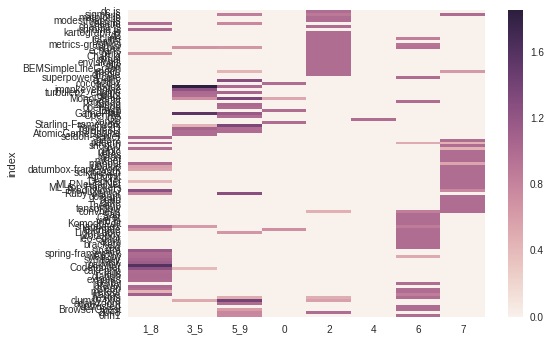

In [165]:
threshold = 0.4
labels = clusters[clusters.columns[0]]
mat = mat.clip_lower(threshold).replace(threshold, 0) # remove values below the threshold
sns.heatmap(mat)
# print(labels)


# Binarize the matrix  (not used)

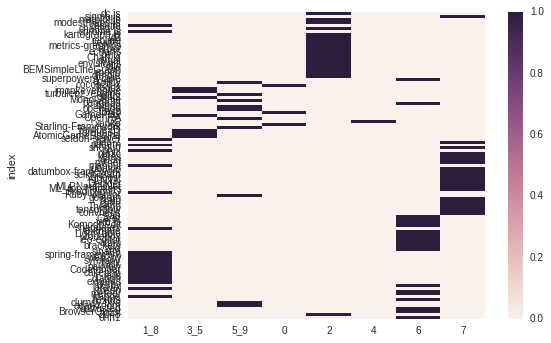

In [166]:
max_clusters = mat.idxmax(axis=1)
bin_mat = mat.copy()
for i in bin_mat.index:
    bin_mat.ix[i,max_clusters[i]] = 100
bin_mat = bin_mat.clip_lower(99).replace(99, 0).replace(100,1) # remove values below the threshold
sns.heatmap(bin_mat)

In [167]:
# num of projects per predicted cluster
num_proj_per_cluster = bin_mat.sum()
num_proj_per_cluster

1_8    21.0
3_5     7.0
5_9    10.0
0       3.0
2      20.0
4       1.0
6      20.0
7      21.0
dtype: float64

In [168]:
# Number of projects per true clusters
labels.value_counts()

Machine Learning     26
Data Visulization    22
Games Engines        20
Web Framework        16
Text Editor          12
Web Games             7
Name: group, dtype: int64

In [169]:
# def precision_soft(index, pred, true):
#     p = 0
#     c_pred_i = pred.loc[index].idxmax() # the column(topics) of max membership
#     c_pred = pred[pred[c_pred_i]==1].index.values # all the cluster of 'index'
#     c_true = true[true==true[index]].index.values # true clutser members
#     intersect = np.intersect1d(c_pred, c_true)
# #     print(intersect)
#     p = intersect.shape[0] / c_pred.shape[0]
#     return p

# def recall_soft(index, pred, true):
#     r = 0
#     c_pred_i = pred.loc[index].idxmax() # the column(topics) of max membership
#     c_pred = pred[pred[c_pred_i]==1].index.values # all the cluster of 'index'
#     c_true = true[true==true[index]].index.values # true clutser members
#     intersect = np.intersect1d(c_pred, c_true)
# #     print(intersect)
#     r = intersect.shape[0] / c_true.shape[0]
#     return r

# Generate clustering accuracy

In [170]:
def precision_soft(index, pred, true):
    p = 0
    intersect = np.arange(0)
    n = 0
    print(index, '--->', pred.loc[index][pred.loc[index]>0].index.values)
    for topic in pred.loc[index][pred.loc[index]>0].index:
        c_pred_i = topic#pred.loc[index].idxmax() # the column(topics) of max membership
        c_pred = pred[pred[c_pred_i]>0].index.values # all the cluster of 'index'
        c_true = true[true==true[index]].index.values # true clutser members
        intersect2 = np.intersect1d(c_pred, c_true)
        if intersect2.shape[0]>intersect.shape[0]:  # choose larger cluster
            intersect = intersect2
            n = c_pred.shape[0]
    
    p = intersect.shape[0] / n if n>0 else 0
    return p


def recall_soft(index, pred, true):
    r = 0
    intersect = np.arange(0)
    for topic in pred.loc[index][pred.loc[index]>0].index:
        c_pred_i = topic#pred.loc[index].idxmax() # the column(topics) of max membership
        c_pred = pred[pred[c_pred_i]>0].index.values # all the cluster of 'index'
        c_true = true[true==true[index]].index.values # true clutser members
        intersect2 = np.intersect1d(c_pred, c_true)
        if intersect2.shape[0]>intersect.shape[0]:  # choose larger cluster
            intersect = intersect2
            
    return intersect.shape[0] / c_true.shape[0]
    
def get_F_score(precision, recall):
    return 2 * precision * recall / (precision+recall)

# ------------------------------------------------------------------

precision = 0
for i in bin_mat.index:
    p = precision_soft(i, mat, labels)
    precision += p

precision = precision/labels.shape[0]
print('precision', precision)

recall = 0
for i in bin_mat.index:
    p = recall_soft(i, mat, labels)
    recall += p

recall = recall/labels.shape[0]
print('recall', recall)

f_score = get_F_score(precision, recall)
print('f score: ', f_score)

dc.js ---> [2]
sigma.js ---> ['5_9' 2 7]
matplotlib ---> [2]
modestmaps-js ---> [2]
cesium ---> ['1_8' '5_9']
chartist-js ---> [2]
chroma.js ---> ['1_8']
kartograph.js ---> [2]
d3 ---> [2]
recline ---> [2 6]
Leaflet ---> [2]
metrics-graphics ---> [2 6]
arbor ---> ['3_5' '5_9' 2 6]
echarts ---> [2]
peity ---> ['1_8' 2]
Chart.js ---> [2]
pygal ---> [2]
envisionjs ---> [2]
raw ---> [2]
BEMSimpleLineGraph ---> [2]
epoch ---> ['5_9' 2 7]
dimple ---> [2]
superpowers-core ---> [6]
duality ---> ['5_9']
cocos2d-x ---> [0]
libgdx ---> ['3_5' '5_9']
jmonkeyengine ---> ['3_5']
turbulenz_engine ---> ['3_5' '5_9']
godot ---> ['3_5']
MonoGame ---> ['3_5' '5_9' 0]
panda3d ---> [6]
spring ---> ['5_9']
openage ---> ['5_9']
Dash ---> [0]
GamePlay ---> ['3_5' '5_9']
OpenRA ---> ['5_9']
GD ---> [4]
xenko ---> [0]
Starling-Framework ---> ['3_5' '5_9']
Torque2D ---> ['3_5' '5_9']
Torque3D ---> ['3_5' '5_9']
AtomicGameEngine ---> ['3_5']
seldon-server ---> ['1_8']
h2o-2 ---> [7]
pattern ---> ['1_8' 6 7]
shogu

In [5]:
# index = 'dc.js'
# c_pred_i = bin_mat.loc[index].idxmax(axis=1) # the column(topics) of max membership
# bin_mat[bin_mat[c_pred_i]==1].index # all the cluster of 'index'
# bin_mat.loc[index][bin_mat.loc[index]>0].index


In [4]:
# labels[labels==labels['dc.js']].index.values